# Supervised Learning: Linear Regression

## Jose Manuel Villa Romero

### 1. Linear regression

1. Create a function simple_linear_regression(X,y) that receives a vector of a descriptor variable X, a response vector y and implements the simple linear regression [2, p.211]:

In [1]:
def simple_linear_regression(x, y):
  try:
    if len(x) != len(y):
      raise ValueError("Input lists must have the same length.")
    if len(x) == 0:
      return []
  except ValueError as e:
    print(e)
    return []
  
  x_mean = sum(x) / len(x)
  y_mean = sum(y) / len(y)

  b1 = sum((y[i] - y_mean) * (x[i] - x_mean) for i in range(len(x))) / sum((x[i] - x_mean) ** 2 for i in range(len(x)))

  b0 = y_mean - b1 * x_mean

  return (b0, b1)

2. A hypermarket has 20 checkouts. We focus on the average waiting time for clients expressed in
minutes, denoted y, versus the number of available checkouts, denoted x. The dataset of size
N = 7 is given in the following table:
x Number of available checkouts 3 4 5 6 8 10 12
y Average waiting time 16 12 9.5 8 6 4.5 4

In [2]:
x = [3, 4, 5, 6, 8, 10, 12]
y = [16, 12, 9.5, 8, 6, 4.5, 4]

a) Data visualization: Define the input x and the output y as numpy arrays and visualize
the scatter plot corresponding to the dataset {(xi,yi)}Ni=1.
Remark. Use the function scatter from matplotlib.pyplot module. For instance:
```python
>>> import matplotlib.pyplot as plt
>>> # X and y are numpy arrays
>>> plt.scatter(X,y)
```

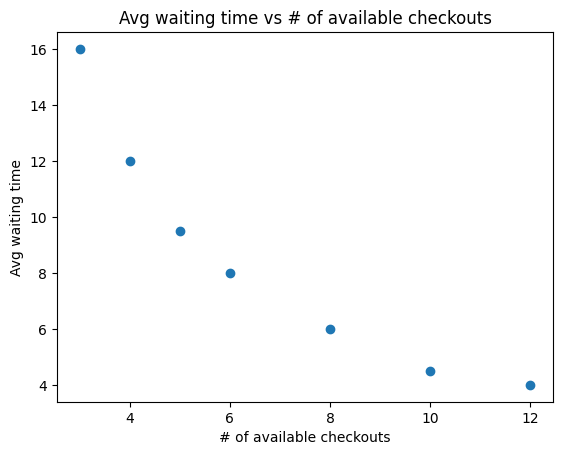

In [3]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.title("Avg waiting time vs # of available checkouts")
plt.xlabel("# of available checkouts")
plt.ylabel("Avg waiting time")
plt.show()

b) Data statistics estimation: Estimate the means, the variances, the covariance and the
correlation coefficient of x and y using the numpy functions mean and var. Are the number
of available checkouts and the average waiting time correlated ?

In [4]:
import numpy as np

print('means:', np.mean(x), np.mean(y))
print('variances:', np.var(x), np.var(y))
print('covariance:', np.cov(x, y)[0][1])
print('correlation coefficient:', np.corrcoef(x, y)[0][1])

means: 6.857142857142857 8.571428571428571
variances: 9.26530612244898 16.03061224489796
covariance: -13.154761904761905
correlation coefficient: -0.9251907056246451


c) Training / Learning: Apply the function simple_linear_regression(X,y) to estimate the coefficients ˆβ0 and ˆβ1 of the regression line (with equation: y = ˆβ0 + ˆβ1x) from the training set {(xi,yi)}Ni=1. Plot the regression line on top of the scatter plot of the data.

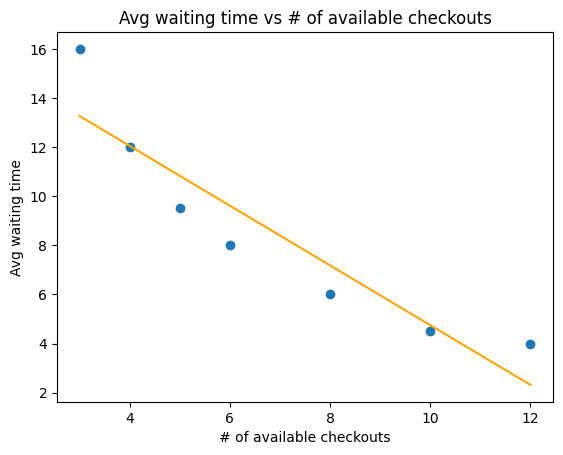

In [5]:
y_new = simple_linear_regression(x, y)
plt.scatter(x, y)
plt.plot(x, [y_new[0] + y_new[1] * xi for xi in x], color='orange')
plt.title("Avg waiting time vs # of available checkouts")
plt.xlabel("# of available checkouts")
plt.ylabel("Avg waiting time")
plt.show()


d) Test / Prediction: Give a prediction of the average waiting time if the hypermarket has
only 1 available checkout, 7 available checkouts, 20 available checkouts.
What do you think about the linear model for this problem ? Is it appropriate ?  
R// No, it doesn't adjust correctly to the points so it's very simple

### 2. Polynomial regression

1. Using numpy, create a function that generates the following artificial dataset:  
(a) yi = 10 + 5xi + 4 sin(10xi) + εi, εi ∼N(0,4),xi ∼U(0,1), i = 1,...,80

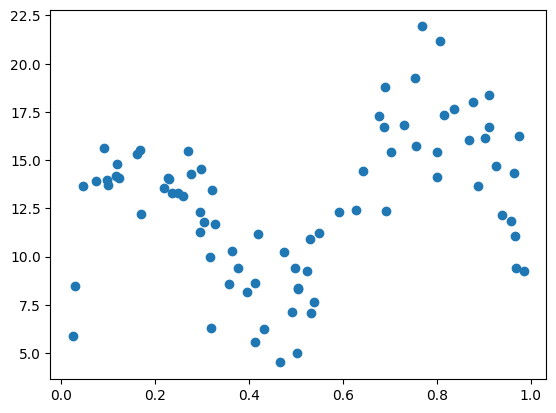

In [6]:
def generate_artificial_data(n=80):
    x = np.random.uniform(0, 1, n)
    epsilon = np.random.normal(0, 2, n)  # Standard deviation is sqrt(4) = 2
    y = 10 + 5 * x + 4 * np.sin(10 * x) + epsilon
    return x, y

x_artificial, y_artificial = generate_artificial_data()
plt.scatter(x_artificial, y_artificial)

2. Create a function linear_regression(X,y) that implements the multidimensional solution for linear regression with

In [7]:
def linear_regression(X, y):
  X = np.array(X)
  if X.ndim == 1:
    X = X.reshape(-1, 1)
  
  X_aug = np.hstack([np.ones((X.shape[0], 1)), X])
  # Calcula los coeficientes usando la pseudo-inversa
  beta = np.linalg.pinv(X_aug) @ y
  return beta

linear_regression(x_artificial, y_artificial)

array([10.812784  ,  3.79684919])

### 3.1 Simple linear regression

1. **Lectura y visualización**  
   - Con `pandas.read_csv()` importa `house_rent.csv` (545 pisos de París: renta vs superficie).  
   - Dibuja un scatter plot. ¿Crees que un modelo lineal es adecuado?  
   - Filtra outliers (p. ej. renta < 10000).

2. **Partición de datos**  
   ```python
   from sklearn.model_selection import train_test_split
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

   loyer  surface
0   1330       37
1   1400       32
2    904       26
3    955       30
4   2545       70


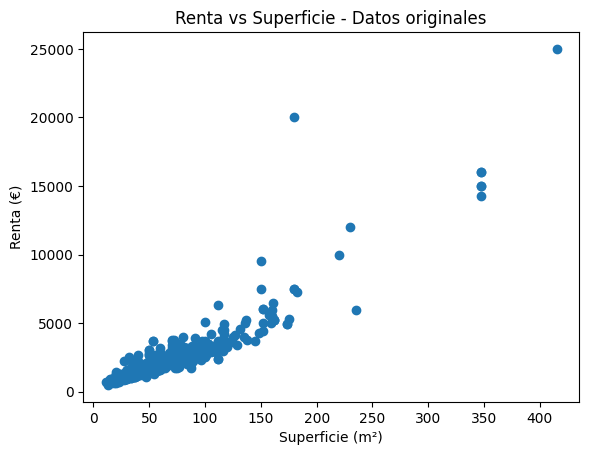

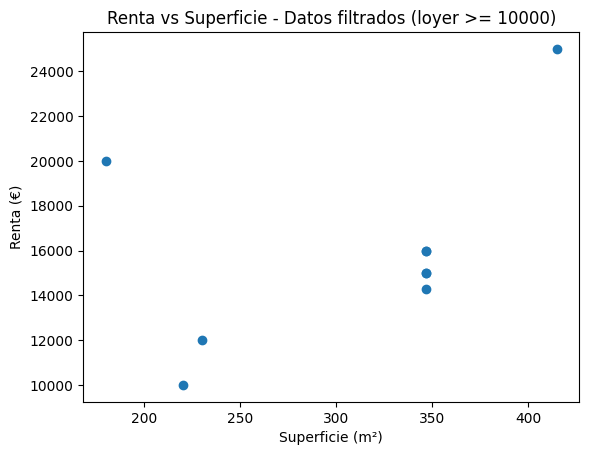

Tamaño del conjunto de entrenamiento: (7, 1)
Tamaño del conjunto de prueba: (2, 1)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 1. Read Dataset
df = pd.read_csv("house_rent.csv")
print(df.head())

# Relation Loyer vs Surface
plt.scatter(df['surface'], df['loyer'])
plt.xlabel("Superficie (m²)")
plt.ylabel("Renta (€)")
plt.title("Renta vs Superficie - Datos originales")
plt.show()

# Filtering out loyer < 10000
df_filtrado = df[df['loyer'] >= 10000]
plt.scatter(df_filtrado['surface'], df_filtrado['loyer'])
plt.xlabel("Superficie (m²)")
plt.ylabel("Renta (€)")
plt.title("Renta vs Superficie - Datos filtrados (loyer >= 10000)")
plt.show()

# 2. Data Splitting
X = df_filtrado['surface'].values.reshape(-1, 1)
y = df_filtrado['loyer'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)